Heigon Soldera 217638
Rafael Galib 204904

(1797, 64)


<Figure size 432x288 with 0 Axes>

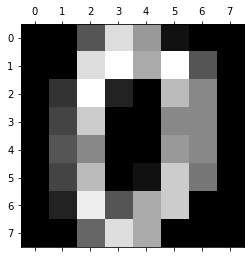

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 